# Web Scraping
<hr style="border:2px solid black">

|Day |Morning           |Afternoon              |
|:----|:----------------|:----------------------|
|Tue |Web Scraping      |Regular Expressions    |
|Wed |Parsing HTML      |Class Imbalance        |
|Thu |Bag of Word       |Naive Bayes |
|Fri |Writing Python Functions   |Recap Session |


In this week's project we will be working with text data and getting an introduction to Natural Language Processing (NLP). For this, the plan is:
Today:
- scrape some text data using the `requests` library
- get useful information out of the HTML using RegEx (`re`). 

The rest of the week:Wednesday to Friday:
- use `BeautifulSoup` to parse HTML easily
- after colleting our corpus, preprocess and clean the text data
- turn the text data into machine readable numbers (Bag of Words and TF-IDF)
- run a classification algorithm to predict the label (Artist) from some input lyrics

Thursday afternoon:

- We see a new classification algorithm that you can use for this week's task (Naive Bayes) in machine learning. We will also look at refactoring your code into functions as it gets more complex in Friday.

### 1. Web Scraping Intro

### Warmup:


In groups, have a look at the [warm-up on the course materials page](https://spiced.space/euclidean-eukalyptus/ds-course/chapters/project_lyrics/web_scraping/README.html)

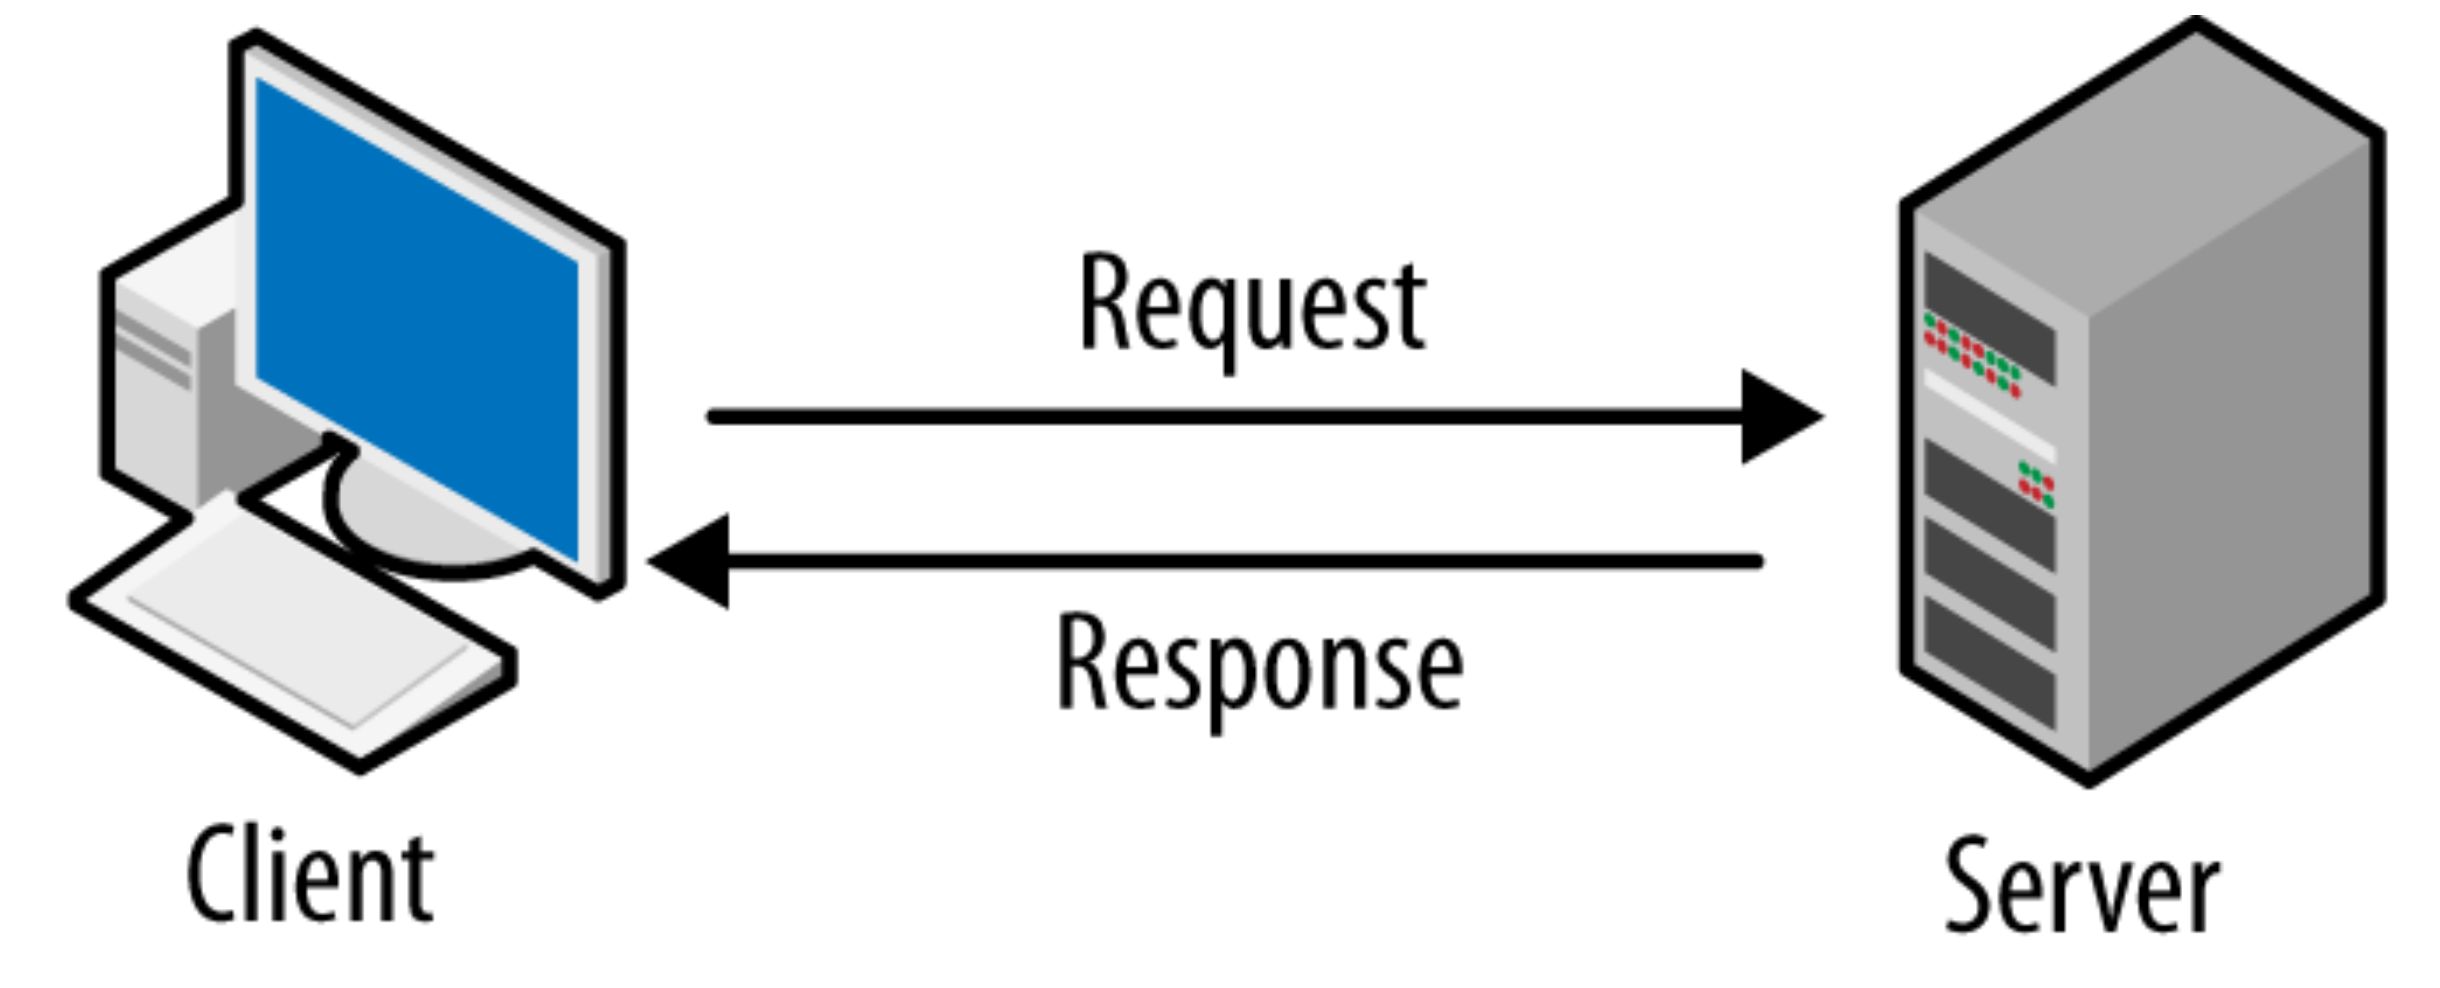
[image source](https://madooei.github.io/cs421_sp20_homepage/api/)

* Markup Language - LaTeX, Markdown, HTML, XML ...
* HTML - HyperText Markup Language (use Firefox developer tools to check)
* CSS - Cascading Style Sheets, defines the style of the webpage   
---
* HTTP(S) - HyperText Transfer Protocol
* port 80 (HTTP) or 443 (HTTPS)
* URL - Uniform Resource Locator, web address.
* Contains protocol (mailto, http, ftp,...), hostname or IP, and file name

<hr style="border:2px solid black">

## 2. Ways to get information

Download file directly - ftp file is on server, can be downloaded if you know the address  
API (Application Programming Interface) - software interface provides well-formatted data  
Web scraping - extraction of data from the webpages directly  

### 2.1 Web Scraping in Python

In [9]:
# !pip install requests
# or for conda:
# !conda install -c anaconda requests 

import requests

In [10]:
url = 'https://www.spiced-academy.com/'

In [11]:
response = requests.get(url)

In [7]:
response


<Response [200]>

200 is a response code. What does it mean?

* 200-range: successful
* 300-range: redirect
* 400-range: there was a problem with the client's request
* 500-range: there was a problem on the end of the server

See [here](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status) for a list of what all the codes mean.


In [12]:
response.status_code

200

The contents of the webpage are saved in the `.text` attribute.

In [13]:
spiced_html = response.text

In [14]:
spiced_html

'<!DOCTYPE html>\n<html lang="en" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#" dir="ltr">\n\n<head>\n    <title>Your new career starts here | Spiced Academy</title>\r\n    <meta name="description" content="Kickstart your new career with our intensive, on-site tech programs in Web Development and Data Science.">\r\n    \r\n    <meta charset="UTF-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\r\n    <link rel=\'stylesheet\' href=\'/css/main.css\'>\r\n    <link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png?v=3">\r\n    <link rel="icon" type="image/png" sizes="32x32" href="/favicon-32x32.png?v=3">\r\n    <link rel="icon" type="image/png" sizes="16x16" href="/favicon-16x16.png?v=3">\r\n    <link rel="mask-icon" href="/safari-pinned-tab.svg" color="#5bbad5">\r\n    <meta name="msapplication-TileColor" content="#da532c">\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n    <meta name="google-site-verifi

What is this output? How is it structured? How can we understand it?

[Is web scraping legal?](https://benbernardblog.com/web-scraping-and-crawling-are-perfectly-legal-right/)

### 2.2 How to stay undetected

* Most web servers try to detect and block (black list) scraping attempts
* To stay undetected you can try following:  
Set a real user agent and other header to appear legit(headers can be found [here](https://github.com/tamimibrahim17/List-of-user-agents)

In [15]:
import requests
header={'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:108.0) Gecko/20100101 Firefox/108.0'}
url='https://www.spiced-academy.com/'
response=requests.get(url, headers=header)

<hr style="border:2px solid black">

## 3. Working with text files

`with open` - so you don't have to remember to close the file

modes:
- `"w"`- write / create
- `"r"` - read
- `"a"`- append

### 3.1 Example:

Write mode creates a file if it doesn't exist or overwrites it if it does:

In [16]:
with open('somefile.txt', "w") as f:
    f.write("blah blah blah")

NB. this syntax saves the file in the same directory you are. If you want to use a different folder use the following code:
`with open('path/to/my/file.txt')`
where the path can be relative or absolute. Relative paths are better as they will not change if somebody else is running your code.

Read mode is read only, you can read in a file and save it as a variable in your code or print it

In [17]:
with open('somefile.txt', "r") as f:
    my_string= f.read()

In [18]:
print(my_string)

blah blah blah


Append mode adds text to the end of a file without overwriting it.

In [19]:
with open("somefile.txt", "a") as f:
    #\n is a new line delimiter
    f.write('\n new line')

In [21]:
with open('somefile.txt', "r") as f:
    my_string= f.read()
    print(my_string)

blah blah blah
 new line


We can also save variables to a text file, eg. the text of a webpage:

In [22]:
with open ("spiced_html", "w") as f:
    f.write(spiced_html)

If we read it in again it saves us from having to download the webpage again.

In [23]:
with open ("spiced_html", 'r') as f:
    text= f.read()
    print(text)

<!DOCTYPE html>
<html lang="en" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#" dir="ltr">

<head>
    <title>Your new career starts here | Spiced Academy</title>
    <meta name="description" content="Kickstart your new career with our intensive, on-site tech programs in Web Development and Data Science.">
    
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <link rel='stylesheet' href='/css/main.css'>
    <link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png?v=3">
    <link rel="icon" type="image/png" sizes="32x32" href="/favicon-32x32.png?v=3">
    <link rel="icon" type="image/png" sizes="16x16" href="/favicon-16x16.png?v=3">
    <link rel="mask-icon" href="/safari-pinned-tab.svg" color="#5bbad5">
    <meta name="msapplication-TileColor" content="#da532c">
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
    <meta name="google-site-verification" content="DICJgJwgfNeeiq66MAwDzpaeqBBg


## 4. Workflow for the Weekly Project

Download the lyrics in txt files (cleaned - web scraping)  
Transform lyrics to a matrix (Bag of Words)  
Train a model and save the trained model on your hard drive  
Write a python program for the prediction  

Steps:
- Download HTML pages:  
think about two artists you like — should sing in the same language, not too
similar download their song lists page from lyrics.com and save it to a file
- Get a list of song urls:  
examine the song lists page in a text editor
find where the links to individual songs are
use regular expressions (or BeautifulSoup) to automate extracting song links
from the song lists page 
- Extract lyrics from song urls:  
loop through the list of song links you extracted
download each song to a file locally

    - tip: one folder per artist, one file per song
    - tip: track your progress (with print statements or [tqdm](https://tqdm.github.io/)
    
    extract lyrics from html file
    
- Get data into tabular form:  
your X will be a list of strings, each string representing one song
your y will be a list of artists, labels
- Feature engineer your data:  
convert lyrics to numbers/features by vectorizing them
- Train a classification algorithm:  
LogReg, trees, forests, or Naive Bayes
- Balance out your dataset

In [24]:
response=requests.get('https://www.lyrics.com/artist/Lady-Gaga')

In [25]:
all_gaga=response.text

In [28]:
print(response.text)

<!doctype html>
<html lang="en-US">
<head>
<meta name="theme-color" content="#830C66"/>

<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
<title>Lady Gaga Lyrics, Songs and Albums | Lyrics.com</title>
<meta name="description" content="Lady Gaga Lyrics - All the great songs and their lyrics from Lady Gaga on Lyrics.com">
<meta name="keywords" content="Lady Gaga lyrics, Lady Gaga song lyrics, Lady Gaga lyric">
<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">
<base href="https://www.lyrics.com/">
<script>
s4Prefix = 'https://static.stands4.com';
version = '1.4.15';
</script>

<link rel="preload" href="https://static.stands4.com/app_common/css/bootstrap-3.4.1.min.css" as="style" />
<link rel="stylesheet" href="https://static.stands4.com/app_common/css/bootstrap-3.4.1.min.css">

<link rel="preconnect" href="https://fonts.googleapis.com" crossorigin />
<link rel="dns-prefetch" href="https://fonts.googleapis.com">
<link